In [ ]:
%pip install pynwb

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pynwb import NWBFile, TimeSeries, NWBHDF5IO

In [18]:
from aind_dynamic_foraging_models.logistic_regression.model import prepare_logistic_design_matrix

### Get example data

Assuming you're in Code Ocean and the data asset `foraging_nwb_bonsai` is attached.

In [8]:
session_name = '/root/capsule/data/foraging_nwb_bonsai/703548_2024-03-20_10-47-42.nwb'


In [ ]:
io = NWBHDF5IO(session_name, mode='r')
nwb = io.read()

In [10]:
df_trial = nwb.trials.to_dataframe()
df_trial[['animal_response', 'rewarded_historyL', 'rewarded_historyR']].head(10)

,animal_response,rewarded_historyL,rewarded_historyR
id,,,
0,1.0,False,False
1,1.0,False,True
2,1.0,False,True
3,1.0,False,False
4,1.0,False,False
5,1.0,False,False
6,1.0,False,False
7,1.0,False,True
8,0.0,True,False


### Get design matrix

In [11]:
# Turn to 0 and 1 coding (assuming all trials are non-autowater trials)
choice_history = df_trial['animal_response'].values
choice_history[choice_history == 2] = np.nan
reward_history = ((df_trial['rewarded_historyL'] == True) + (df_trial['rewarded_historyR'] == True)).astype(int).values

In [12]:
X, Y = prepare_logistic_design_matrix(choice_history, 
                                      reward_history, 
                                      logistic_model='Su2022', 
                                      trials_back=15)

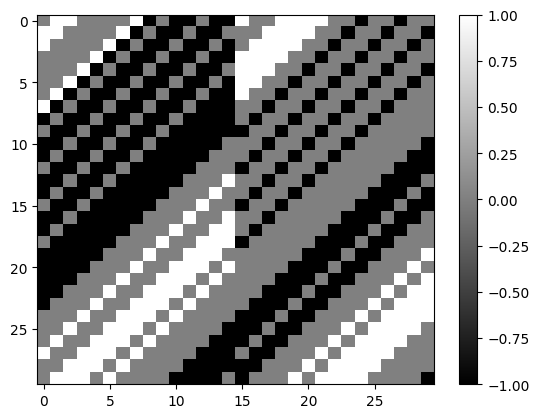

In [32]:
plt.imshow(X[:30,:], aspect='auto', cmap='gray')
plt.colorbar()
plt.show()